# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        #print(json.dumps(city_weather,indent=4,sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | meadow lakes
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | rio san juan
Processing Record 8 of Set 1 | tarawa
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | santa maria da boa vista
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | qamdo
Processing Record 13 of Set 1 | fisterra
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | novolukoml'
City not found. Skipping...
Processing Record 16 of Set 1 | yeppoon
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | ahau
City not found. Skipping...
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | kone
Processing Record 21 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,8.86,90,47,2.59,NZ,1721513369
1,san antonio de pale,-1.4014,5.6325,22.79,74,53,4.61,GQ,1721513370
2,meadow lakes,61.6247,-149.6011,24.05,59,0,1.54,US,1721513372
3,ust-nera,64.5667,143.2000,13.10,97,100,2.87,RU,1721513373
4,wailua homesteads,22.0669,-159.3780,27.85,67,40,5.14,US,1721513374


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.86,90,47,2.59,NZ,1721513369
1,san antonio de pale,-1.4014,5.6325,22.79,74,53,4.61,GQ,1721513370
2,meadow lakes,61.6247,-149.6011,24.05,59,0,1.54,US,1721513372
3,ust-nera,64.5667,143.2000,13.10,97,100,2.87,RU,1721513373
4,wailua homesteads,22.0669,-159.3780,27.85,67,40,5.14,US,1721513374


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

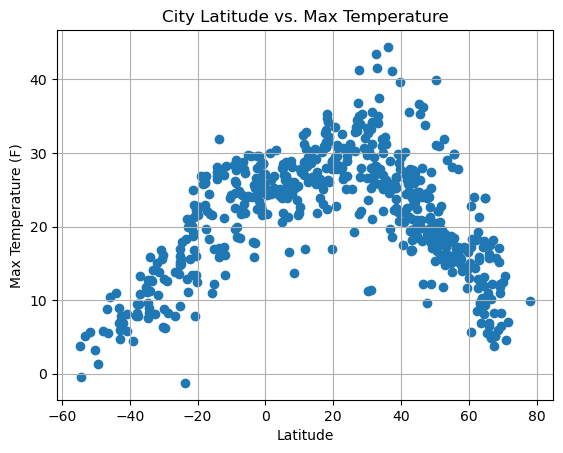

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

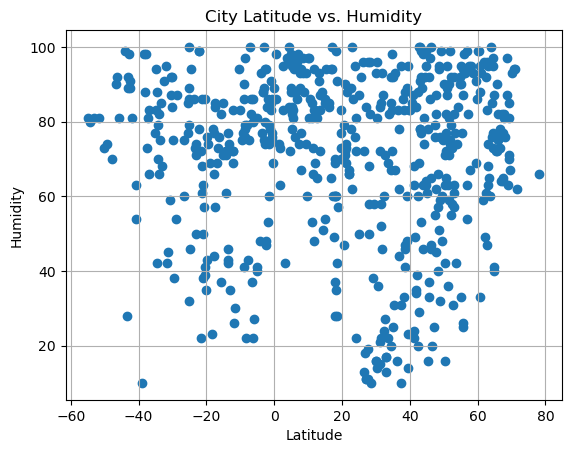

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

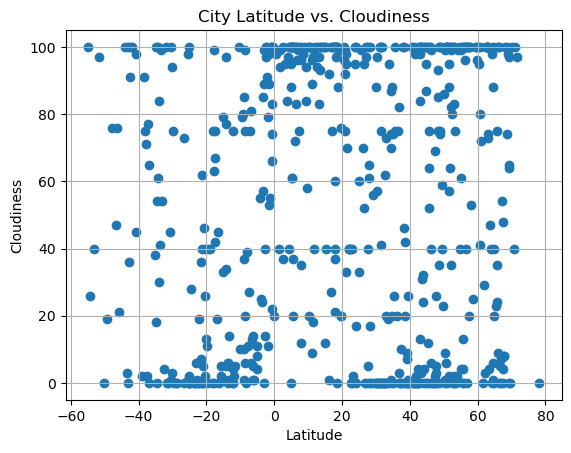

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

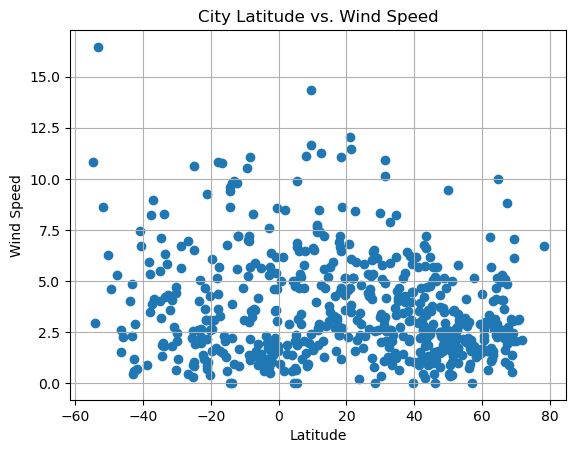

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,meadow lakes,61.6247,-149.6011,24.05,59,0,1.54,US,1721513372
3,ust-nera,64.5667,143.2000,13.10,97,100,2.87,RU,1721513373
4,wailua homesteads,22.0669,-159.3780,27.85,67,40,5.14,US,1721513374
5,mount pearl,47.5166,-52.7813,18.37,76,2,1.47,CA,1721513375
6,rio san juan,19.6439,-70.0763,27.86,83,99,4.33,DO,1721513376


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.86,90,47,2.59,NZ,1721513369
1,san antonio de pale,-1.4014,5.6325,22.79,74,53,4.61,GQ,1721513370
9,santa maria da boa vista,-8.8078,-39.8256,26.18,41,85,6.93,BR,1721513264
14,yeppoon,-23.1333,150.7333,12.88,50,0,5.04,AU,1721513387
15,chonchi,-42.6128,-73.8092,7.29,91,100,0.56,CL,1721513388


###  Temperature vs. Latitude Linear Regression Plot

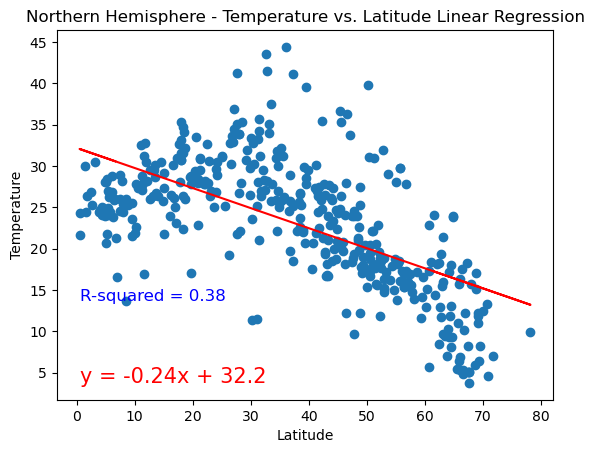

In [20]:
# Linear regression on Northern Hemisphere
x_values_nor = northern_hemi_df["Lat"]
y_values_nor = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nor, y_values_nor)
regress_values = x_values_nor * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue ** 2

# Create scatter plot
plt.scatter(x_values_nor, y_values_nor)
plt.plot(x_values_nor, regress_values, "r-")
plt.annotate(line_eq, (x_values_nor.min(), y_values_nor.min()), fontsize=15, color="red")
plt.annotate(f"R-squared = {round(r_squared, 2)}", (x_values_nor.min(), y_values_nor.min() + 10), fontsize=12, color="blue")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Temp_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

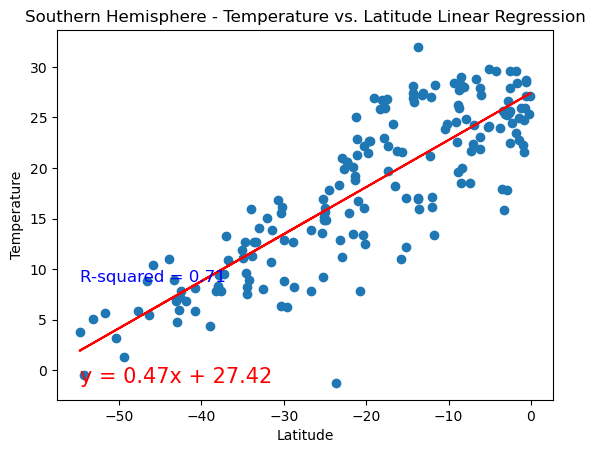

In [21]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue ** 2

# Create scatter plot
plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values, "r-")
plt.annotate(line_eq, (x_values_south.min(), y_values_south.min()), fontsize=15, color="red")
plt.annotate(f"R-squared = {round(r_squared, 2)}", (x_values_south.min(), y_values_south.min() + 10), fontsize=12, color="blue")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Temp_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

In [30]:
**Discussion about the linear relationship:** 
There is a positive corrolation between temperature and lattitude in the southern hemisphere because r-squared is more than .5 at .74, but
there is a negative correlation between temp and lat in northern hmisphere.


SyntaxError: invalid syntax (1042051157.py, line 1)

### Humidity vs. Latitude Linear Regression Plot

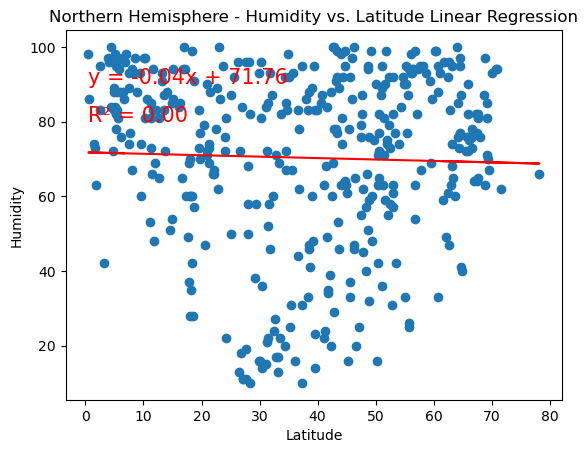

In [27]:
# Northern Hemisphere

# Perform linear regression
x_values_nor = northern_hemi_df["Lat"]
y_values_nor = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nor, y_values_nor)
regress_values = x_values_nor * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_nor, y_values_nor)
plt.plot(x_values_nor, regress_values, "r-")
plt.annotate(line_eq, (min(x_values_nor), max(y_values_nor) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_nor), max(y_values_nor) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

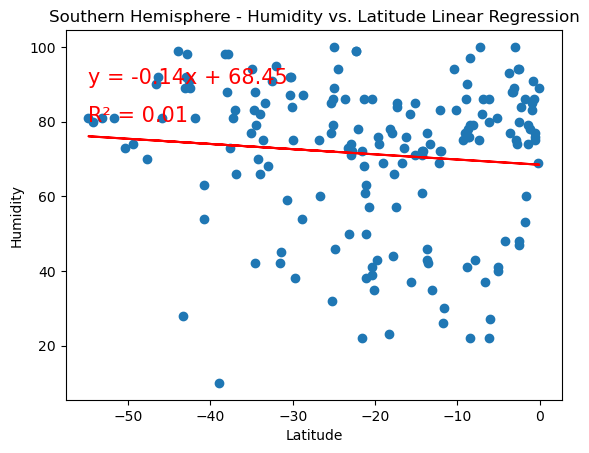

In [28]:
# Southern Hemisphere

# Perform linear regression
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values, "r-")
plt.annotate(line_eq, (min(x_values_south), max(y_values_south) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_south), max(y_values_south) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** there isn't a correlation between humitity and lat because r-squared is much lower than .5


### Cloudiness vs. Latitude Linear Regression Plot

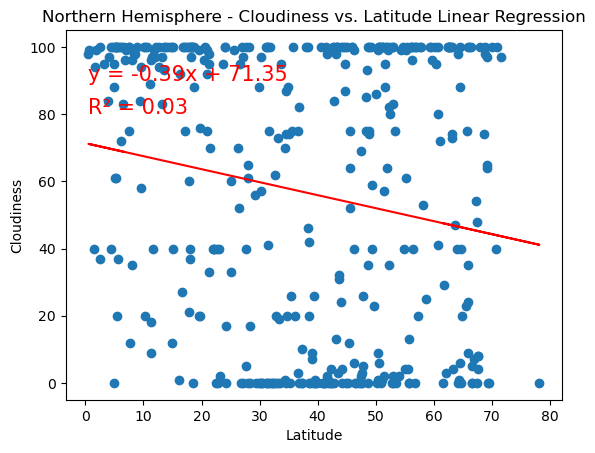

In [31]:
# Northern Hemisphere

# Perform linear regression
x_values_nor = northern_hemi_df["Lat"]
y_values_nor = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nor, y_values_nor)
regress_values = x_values_nor * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_nor, y_values_nor)
plt.plot(x_values_nor, regress_values, "r-")
plt.annotate(line_eq, (min(x_values_nor), max(y_values_nor) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_nor), max(y_values_nor) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

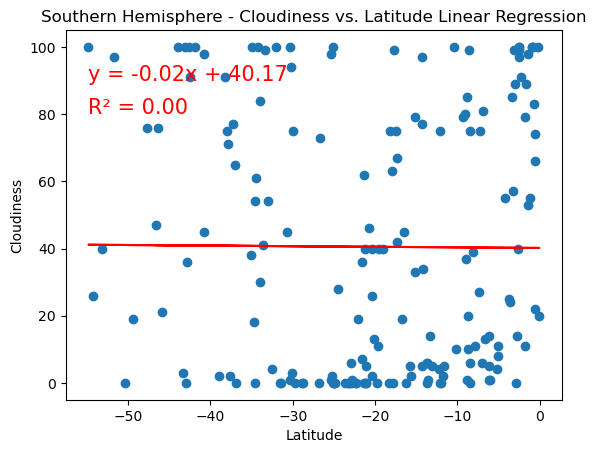

In [32]:
# Southern Hemisphere

# Perform linear regression
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values, "r-")
plt.annotate(line_eq, (min(x_values_south), max(y_values_south) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_south), max(y_values_south) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** there is not relationship between cloudiness and latitude. both hemisphere had their r-squared at much lower than .5


### Wind Speed vs. Latitude Linear Regression Plot

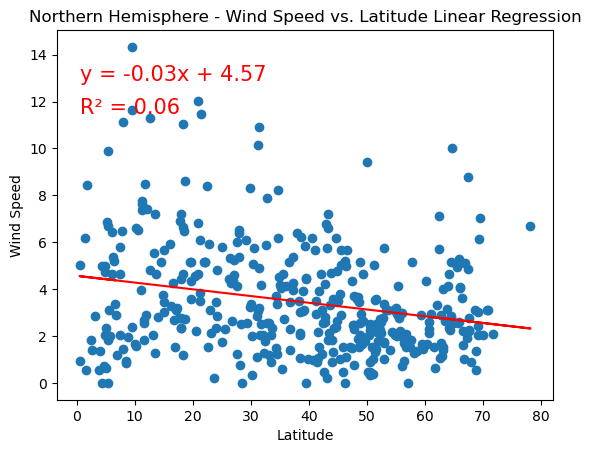

In [33]:
# Northern Hemisphere

# Perform linear regression
x_values_nor = northern_hemi_df["Lat"]
y_values_nor = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_nor, y_values_nor)
regress_values = x_values_nor * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_nor, y_values_nor)
plt.plot(x_values_nor, regress_values, "r-")

# Annotate the equation and R-squared value
plt.annotate(line_eq, (min(x_values_nor), max(y_values_nor) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_nor), max(y_values_nor) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

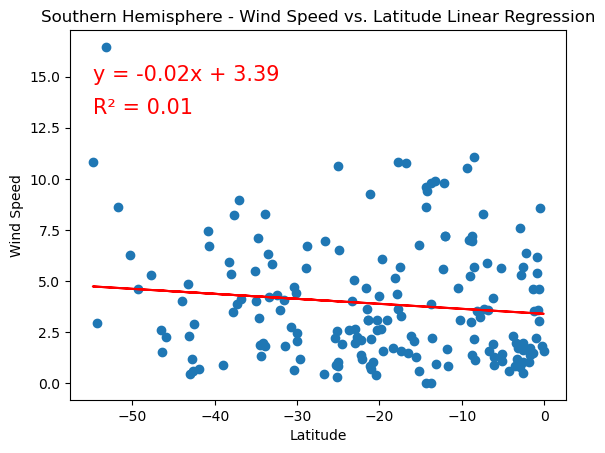

In [34]:
# Southern Hemisphere

# Perform linear regression
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared value
r_squared = rvalue**2
r_squared_text = f"R² = {r_squared:.2f}"

# Create scatter plot
plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values, "r-")

# Annotate the equation and R-squared value
plt.annotate(line_eq, (min(x_values_south), max(y_values_south) * 0.9), fontsize=15, color="red")
plt.annotate(r_squared_text, (min(x_values_south), max(y_values_south) * 0.8), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Lat_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** there is not relationship between wind speed and latitude because their r-squared is much lower than .5